In [59]:
import sys
import os
sys.path.append("C:/Users/SM/dir_/FontProject/_석사코드정리_학제간연구용/3. 유사폰트추천코드/img2vec/img2vec_pytorch")  # Adds higher directory to python modules path.
from img_to_vec import Img2Vec
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

In [60]:
model_name = "inception"
img2vec =Img2Vec(model=model_name)

AdaptiveAvgPool2d(output_size=(1, 1))


In [61]:
input_path = '../폰트 렌더링/IT공학전공'
list_pics1 = []
filenames1 = []
for file1 in os.listdir(input_path):
    filename1 = os.fsdecode(file1)
    img1 = Image.open(os.path.join(input_path, filename1))
    list_pics1.append(img1)
    filenames1.append(filename1)

In [62]:
vectors1 = img2vec.get_vec(list_pics1)
pics1 = {}
for i1, vec1 in enumerate(vectors1):
    pics1[filenames1[i1]] = vec1

(8, 2048)


In [63]:
# 폰트 목록 가져오기
font_list = os.listdir(input_path)
for idx, font in enumerate(font_list):
  font_list[idx] = font.strip('.png')

pic_format=".png"
font_list

['DX새날Bold',
 'HanS_한강캘리',
 'KBIZ한마음고딕 L',
 '배스킨라빈스 B',
 '이순신돋움체L',
 '조선일보명조',
 '타이포꾸미기입체빗금',
 '휴먼옛체']

In [64]:
entire_word_similarity = []

for font_name in font_list:
  pic_name = font_name + pic_format    #pic_name : 입력 글꼴 목록 중 하나
  
  try:
    sims1 = {}
    for key1 in list(pics1.keys()):
      sims1[key1] = cosine_similarity(pics1[pic_name].reshape((1, -1)), pics1[key1].reshape((1, -1)))[0][0] #벡터화 데이터, 코사인 유사도 계산

    word_similarity = list(sims1.values())
    entire_word_similarity.append(word_similarity)
                
  except KeyError as e:
    print('Could not find filename %s' % e)

  except Exception as e:
    print(e)

In [65]:
import pandas as pd
df = pd.DataFrame(entire_word_similarity,columns=font_list)
df

,DX새날Bold,HanS_한강캘리,KBIZ한마음고딕 L,배스킨라빈스 B,이순신돋움체L,조선일보명조,타이포꾸미기입체빗금,휴먼옛체
0,1.000000,0.857929,0.617885,0.583897,0.570932,0.578977,0.699420,0.637351
1,0.857929,1.000000,0.627794,0.530152,0.509066,0.521510,0.686831,0.572315
2,0.617885,0.627794,1.000000,0.791230,0.839535,0.778973,0.689918,0.742849
3,0.583897,0.530152,0.791230,1.000000,0.855621,0.791224,0.643536,0.891352
4,0.570932,0.509066,0.839535,0.855621,1.000000,0.836921,0.639062,0.858604
5,0.578977,0.521510,0.778973,0.791224,0.836921,1.000000,0.688209,0.802150
6,0.699420,0.686831,0.689918,0.643536,0.639062,0.688209,1.000000,0.671495
7,0.637351,0.572315,0.742849,0.891352,0.858604,0.802150,0.671495,1.000000


c:\Users\SM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\SM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\SM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\SM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\SM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\SM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  fon

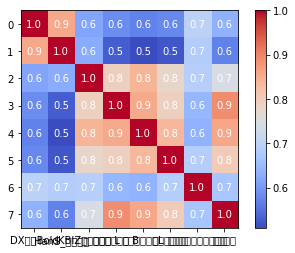

In [66]:

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(df,cmap='coolwarm',interpolation='none')

for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        plt.text(i,j,round(df.iloc[j,i],1),ha='center',va='center',color="white")

plt.xticks(range(len(df.columns)),df.columns) 
plt.yticks(range(len(df.index)), df.index) 

plt.colorbar()
plt.show()

In [67]:
df.insert(0, "font", font_list)
df

,font,DX새날Bold,HanS_한강캘리,KBIZ한마음고딕 L,배스킨라빈스 B,이순신돋움체L,조선일보명조,타이포꾸미기입체빗금,휴먼옛체
0,DX새날Bold,1.000000,0.857929,0.617885,0.583897,0.570932,0.578977,0.699420,0.637351
1,HanS_한강캘리,0.857929,1.000000,0.627794,0.530152,0.509066,0.521510,0.686831,0.572315
2,KBIZ한마음고딕 L,0.617885,0.627794,1.000000,0.791230,0.839535,0.778973,0.689918,0.742849
3,배스킨라빈스 B,0.583897,0.530152,0.791230,1.000000,0.855621,0.791224,0.643536,0.891352
4,이순신돋움체L,0.570932,0.509066,0.839535,0.855621,1.000000,0.836921,0.639062,0.858604
5,조선일보명조,0.578977,0.521510,0.778973,0.791224,0.836921,1.000000,0.688209,0.802150
6,타이포꾸미기입체빗금,0.699420,0.686831,0.689918,0.643536,0.639062,0.688209,1.000000,0.671495
7,휴먼옛체,0.637351,0.572315,0.742849,0.891352,0.858604,0.802150,0.671495,1.000000
